In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import bilby
import numpy as np

import hphc9
import hphc10

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

%matplotlib inline

In [ ]:
def get_injection_snr(injection_parameters):
    duration = 4.
    sampling_frequency = 2048.
    np.random.seed(88170235)
    waveform_generator = bilby.gw.WaveformGenerator(
        duration=duration,
        sampling_frequency=sampling_frequency,
        frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
        parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
        waveform_arguments=dict(
            waveform_approximant='IMRPhenomPv2',
            reference_frequency=50., minimum_frequency=20.
        )
    )
    # Set up interferometers.
    ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
    ifos.set_strain_data_from_power_spectral_densities(
        sampling_frequency=sampling_frequency,
        duration=duration,
        start_time=injection_parameters['geocent_time'] - 2
    )
    ifos.inject_signal(
        waveform_generator=waveform_generator,
        parameters=injection_parameters
    )
    snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]
    return np.sqrt(np.sum([i ** 2 for i in snrs]))

In [2]:
(C**3)/( G*(20+20)*Mo*np.pi*6**(3/2) )

109.90037592347498

In [2]:
sampling_frequency = 1024.0
duration = 4.0

In [3]:
def eccentric_waveform(frequency_array_, chirp_mass, mass_ratio, eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec):
    frequency_array = np.array(frequency_array_)
    
    mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
    mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)
    luminosity_distance = luminosity_distance*Mpc
    total_mass = (mass_1+mass_2)*Mo
    symmetric_mass_ratio = (mass_1*mass_2)/((mass_1+mass_2)**2)
    maximum_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
    minimum_f = 20.0
    mass_diff = (mass_1-mass_2)*Mo
    
    N = len(frequency_array)
    h_plus = np.zeros(N)*1j
    h_cross = np.zeros(N)*1j
    
    k = 0
    for f in frequency_array:
        if f>=minimum_f and f<=maximum_f: 
            arg_plus = {'iota_':theta_jn, 'beta_':psi, 'D_':luminosity_distance , \
                        'f_':f, 'f0_':20.0, 'et0_':eccentricity, 'phic_':phase, \
                        'tc_':geocent_time, 'M_':total_mass, 'eta_':symmetric_mass_ratio, \
                        'ff_':maximum_f, 'delta_':mass_diff}

            fplus = hphc10.Fn(**arg_plus)

            h_plus[k] = fplus.htilde()[0]
            h_cross[k] = fplus.htilde()[1]
        k = k+1

    return {'plus': h_plus, 'cross': h_cross}

In [3]:
def eccentric_waveform(frequency_array_, chirp_mass, mass_ratio, eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec):
    
    mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
    mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)
    luminosity_distance = luminosity_distance*Mpc
    total_mass = (mass_1+mass_2)*Mo
    symmetric_mass_ratio = (mass_1*mass_2)/((mass_1+mass_2)**2)
    maximum_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
    minimum_f = 20.0
    mass_diff = (mass_1-mass_2)*Mo
    
    foo = np.array(frequency_array_)
    N = len(foo)
    h_plus = np.zeros(N)*1j
    h_cross = np.zeros(N)*1j

    mask_3 = np.logical_and(foo >= minimum_f, foo <= maximum_f)
    index = np.array(np.where(mask_3)).flatten()
    
    for k in index:
        arg_plus = {'iota_':theta_jn, 'beta_':psi, 'D_':luminosity_distance , \
                    'f_':foo[k], 'f0_':20.0, 'et0_':eccentricity, 'phic_':phase, \
                    'tc_':geocent_time, 'M_':total_mass, 'eta_':symmetric_mass_ratio, \
                    'ff_':maximum_f, 'delta_':mass_diff}

        fplus = hphc10.Fn(**arg_plus)

        h_plus[k] = fplus.htilde()[0]
        h_cross[k] = fplus.htilde()[1]

    #return {'plus': h_plus, 'cross': h_cross}
    return {'plus': h_plus, 'cross': h_cross}

In [7]:
eccentric_waveform([30],19.564163812778446,0.9148936170212766,0.1,200.0,0.4,0.1,1.2,1180002601.0,45,5.73)

{'plus': array([-5.36029112e-23+3.18179166e-23j]),
 'cross': array([-3.17752409e-23-5.34641083e-23j])}

In [95]:
import time 

fff = np.arange(0.0,512.0,0.25)
t0 = time.time()
zz = eccentric_waveform(fff,28.19,0.86,0.1,440.0,0.4,0.1,1.2,1180002601.0,45,5.73)

t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 18.0161


In [110]:
foo = np.array([1,2,3,4])
mask_3 = foo>2
np.where(mask_3)

(array([2, 3]),)

In [4]:
def eccentric_waveform(frequency_array_, chirp_mass, mass_ratio, eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec):
    
    mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5)
    mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5)
    luminosity_distance = luminosity_distance*Mpc
    total_mass = (mass_1+mass_2)*Mo
    symmetric_mass_ratio = (mass_1*mass_2)/((mass_1+mass_2)**2)
    maximum_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
    minimum_f = 20.0
    mass_diff = (mass_1-mass_2)*Mo
    
    foo = np.array(frequency_array_)
    N = len(foo)
    h_plus = np.zeros(N)*1j
    h_cross = np.zeros(N)*1j

    mask_3 = foo >= 1.0
    index = np.array(np.where(mask_3)).flatten()
    
    for k in index:
        arg_plus = {'iota_':theta_jn, 'beta_':psi, 'D_':luminosity_distance , \
                    'f_':foo[k], 'f0_':20.0, 'et0_':eccentricity, 'phic_':phase, \
                    'tc_':geocent_time, 'M_':total_mass, 'eta_':symmetric_mass_ratio, \
                    'ff_':maximum_f, 'delta_':mass_diff}

        fplus = hphc10.Fn(**arg_plus)

        h_plus[k] = fplus.htilde()[0]
        h_cross[k] = fplus.htilde()[1]

    #return {'plus': h_plus, 'cross': h_cross}
    return {'plus': h_plus, 'cross': h_cross}

In [10]:
eccentric_waveform([1],16.749689566557148,0.6,0.1,200.0,0.4,0.1,1.2,1180002601.0,45,5.73)

{'plus': array([nan+nanj]), 'cross': array([nan+nanj])}

In [34]:
items = ((d,28.19,0.86,0.1,440.0,0.4,0.1,1.2,1180002601.0,45,5.73) for d in fff)
argg = list(items)

In [50]:
np.array(result)[:,1]

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

In [99]:
import time 

fff = np.arange(0.0,512.0,0.25)
t0 = time.time()
zz = eccentric_waveform(fff,28.19,0.86,0.1,440.0,0.4,0.1,1.2,1180002601.0,45,5.73)

t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 19.4486


In [8]:
#chirp mass
m1=25.0
m2=25.0
((m1*m2)**(3/5))/((m1+m2)**(1/5))

21.7637640824031

In [21]:
#mass ratio
m2/m1

0.9148936170212766

In [4]:
#injection_parameters = dict(mass_1=25.0, mass_2=10.0, eccentricity=0.1, luminosity_distance=200.0, theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)
injection_parameters = dict(chirp_mass=19.564163812778446, mass_ratio=0.9148936170212766, eccentricity=0.1, luminosity_distance=1000.0, theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=45.0, dec=5.73)

In [5]:
# Now we pass our source function to the WaveformGenerator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=eccentric_waveform)

11:51 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.eccentric_waveform
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [8]:
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
injection = ifos.inject_signal(
    waveform_generator=waveform_generator,
    parameters=injection_parameters)

/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
15:18 bilby INFO    : Injected signal in H1:
15:18 bilby INFO    :   optimal SNR = 91.28
15:18 bilby INFO    :   matched filter SNR = 91.59-0.75j
15:18 bilby INFO    :   chirp_mass = 19.564163812778446
15:18 bilby INFO    :   mass_ratio = 0.9148936170212766
15:18 bilby INFO    :   eccentricity = 0.1
15:18 bilby INFO    :   luminosity_distance = 200.0
15:18 bilby INFO    :   theta_jn = 0.4
15:18 bilby INFO    :   psi = 0.1
15:18 bilby INFO    :   phase = 1.2
15:18 bilby INFO    :   geocent_time = 1180002601.0
15:18 bilby INFO    :   ra = 45.0
15:18 bilby INFO    :   dec = 5.73
15:18 bilby INFO    : Injected signal in L1:
15:18 bilby INFO    :   optimal SNR = 53.68
15:18 bilby INFO    :   matched filter SNR = 53.52+0.89j
1

In [6]:
# Set up interferometers.
#maximum_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
minimum_frequency = 20.0+3.0
MM1 = 25.0
MM2 = 25.0
maximum_frequency = (C**3)/( G*(MM1+MM2)*Mo*np.pi*6**(3/2) )-3.0

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)


/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
11:52 bilby INFO    : Injected signal in H1:
11:52 bilby INFO    :   optimal SNR = 17.17
11:52 bilby INFO    :   matched filter SNR = 16.29+0.77j
11:52 bilby INFO    :   chirp_mass = 19.564163812778446
11:52 bilby INFO    :   mass_ratio = 0.9148936170212766
11:52 bilby INFO    :   eccentricity = 0.1
11:52 bilby INFO    :   luminosity_distance = 1000.0
11:52 bilby INFO    :   theta_jn = 0.4
11:52 bilby INFO    :   psi = 0.1
11:52 bilby INFO    :   phase = 1.2
11:52 bilby INFO    :   geocent_time = 1180002601.0
11:52 bilby INFO    :   ra = 45.0
11:52 bilby INFO    :   dec = 5.73
11:52 bilby INFO    : Injected signal in L1:
11:52 bilby INFO    :   optimal SNR = 10.10
11:52 bilby INFO    :   matched filter SNR = 11.16-1.82j


[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

In [14]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]

In [15]:
snrs

[17.168051748303636, 10.096710760740292]

In [16]:
np.sqrt(np.sum([i ** 2 for i in snrs]))

19.916966862915658

11:52 bilby INFO    : Injected signal in H1:
11:52 bilby INFO    :   optimal SNR = 17.17
11:52 bilby INFO    :   matched filter SNR = 33.46+0.77j
11:52 bilby INFO    :   chirp_mass = 19.564163812778446
11:52 bilby INFO    :   mass_ratio = 0.9148936170212766
11:52 bilby INFO    :   eccentricity = 0.1
11:52 bilby INFO    :   luminosity_distance = 1000.0
11:52 bilby INFO    :   theta_jn = 0.4
11:52 bilby INFO    :   psi = 0.1
11:52 bilby INFO    :   phase = 1.2
11:52 bilby INFO    :   geocent_time = 1180002601.0
11:52 bilby INFO    :   ra = 45.0
11:52 bilby INFO    :   dec = 5.73
11:52 bilby INFO    : Injected signal in L1:
11:52 bilby INFO    :   optimal SNR = 10.10
11:52 bilby INFO    :   matched filter SNR = 21.25-1.82j
11:52 bilby INFO    :   chirp_mass = 19.564163812778446
11:52 bilby INFO    :   mass_ratio = 0.9148936170212766
11:52 bilby INFO    :   eccentricity = 0.1
11:52 bilby INFO    :   luminosity_distance = 1000.0
11:52 bilby INFO    :   theta_jn = 0.4
11:52 bilby INFO    :  

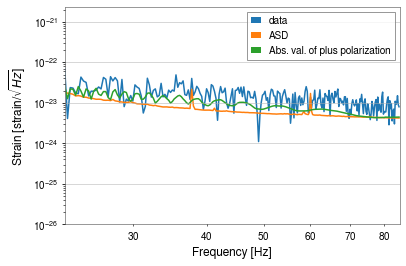

In [7]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["cross"][idxs]),
          label="Abs. val. of plus polarization")

ax.set_xlim(minimum_frequency,maximum_frequency)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [8]:
#17.411011265922482,19.441935582935383,21.7637640824031
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = bilby.core.prior.Uniform(name='chirp_mass', minimum=17.411,maximum=21.764)
prior['mass_ratio'] = bilby.core.prior.Uniform(name='mass_ratio', minimum=0.5, maximum=1)
prior['eccentricity'] = bilby.core.prior.LogUniform(name='eccentricity', minimum=0.01, maximum=0.2)

prior["luminosity_distance"] = 200.0
prior["theta_jn"] = 0.4
prior["psi"] = 0.1
prior["phase"] = 1.2
prior["geocent_time"] = 1180002601.0
prior["ra"] = 45.0
prior["dec"] = 5.73

In [13]:
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator, priors=prior,
    time_marginalization=False, phase_marginalization=False, distance_marginalization=False)

In [ ]:
result_short = bilby.run_sampler(
    likelihood, prior, sampler='dynesty', outdir='short', label="eccn",
    nlive=500, dlogz=3, npool=16,  # <- Arguments are used to make things fast - not recommended for general use
    clean=True
)

15:22 bilby INFO    : Running for label 'eccn', output will be saved to 'short'
15:22 bilby INFO    : Using lal version 6.21.0
15:22 bilby INFO    : Using lal git version Branch: None;Tag: lal-v6.21.0;Id: 37caf89936b637993c30b3076fe4b853311873ee;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
15:22 bilby INFO    : Using lalsimulation version 1.10.0
15:22 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v1.10.0;Id: 5bfe091197594d55cf634f8a1c004eb9dc9b6459;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
15:22 bilby INFO    : Search parameters:
15:22 bilby INFO    :   chirp_mass = Uniform(minimum=17.411, maximum=21.764, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
15:22 bilby INFO    :   mass_ratio = Uniform(minimum=0.5, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None)
15:22 bilby INFO    :   eccentrici

In [ ]:
result_short.plot_corner(parameters=["chirp_mass", "mass_ratio", "eccentricity"], prior=True)

In [9]:
# Initialising the likelihood function.
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator)

In [13]:
# Now we run sampler (PyMultiNest in our case).
result = bilby.run_sampler(
    likelihood=likelihood, priors=prior, sampler='pymultinest', npoints=500, npool=16,
    injection_parameters=injection_parameters, outdir='short', label="eccn")

12:00 bilby INFO    : Running for label 'eccn', output will be saved to 'short'
12:00 bilby INFO    : Using lal version 6.21.0
12:00 bilby INFO    : Using lal git version Branch: None;Tag: lal-v6.21.0;Id: 37caf89936b637993c30b3076fe4b853311873ee;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
12:00 bilby INFO    : Using lalsimulation version 1.10.0
12:00 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v1.10.0;Id: 5bfe091197594d55cf634f8a1c004eb9dc9b6459;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed



ERROR:   Could not load MultiNest library "libmultinest.so"
ERROR:   You have to build it first,
ERROR:   and point the LD_LIBRARY_PATH environment variable to it!
ERROR:   manual: http://johannesbuchner.github.com/PyMultiNest/install.html


ERROR:   Could not load MultiNest library: libmultinest.so
ERROR:   You have to build MultiNest,
ERROR:   and point the LD_LIBRARY_PATH environment variable to it!
ERROR:   manual: http://johannesbuchner.github.com/PyMultiNest/install.html

problem: libmultinest.so: cannot open shared object file: No such file or directory


SamplerNotInstalledError: Sampler pymultinest is not installed on this system